# Predictive Modeling for Customer Churn for Telephone Company

<img src='images/pk-1.png' alt='Customer Churn' width='1000'>

### We are investigating customer churn for our customer, SyriaTel, who wishes to understand more about why certain customers cancel their service ('churn') to help them develop a more effective retention strategy, such as lowering or international calling rates or additional investments in technical support representatives to handle customers' technical issues that may be causing churn. 

### Our dataset, Syria Tel's own internally collected data, which is located here: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset has been saved as 'cust_churn.csv' and contains features data on customer's State, account length (represented in days), area code and phone number, if they have international and / or voicemail plans, if so, the number of voicemail messages they have sent (?) as vmail messages, and for the categories of daytime calls, evening calls, nighttime calls, and international calls, we are given eaches total number of minutes, total number of calls, the total amounts charged, how many customer service calls the customer made and whether they ultimately churned or not. 

### During this analysis we will build multiple predictive models using 'churn' as our target variable, analyzing the effect each parameter has upon the churn rate. We are seeking a model with maximum accuracy, using a blackbox model for high performance, 

In [1]:
#Importing the standard libraries using the standard aliasing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings


%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", module="sklearn.svm")

In [3]:
#Loading in our dataset
df = pd.read_csv('cust_churn.csv')

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#analyzing the shape
df.shape

(3333, 21)

In [6]:
#what are our column names?
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
#In order to accurately continue our EDA we will create a preprocessor function that will enable us to transform all of our 
#data quickly and in the same way. 

def preprocessor(df):
    from sklearn.preprocessing import LabelEncoder
    copy_df = df.copy()

    # creating a LabelEncoder to use for our 'state' column.
    le = LabelEncoder()

    # We will now use classification methods on our categorical values 'state', 'international plan', 'voice mail plan', and 'churn'. 
    copy_df['state'] = le.fit_transform(copy_df['state'], )
    copy_df['international plan'] = copy_df['international plan'].map({'no':0, 'yes':1})
    copy_df['voice mail plan'] = copy_df['voice mail plan'].map({'no':0, 'yes':1})
    copy_df['churn'] = copy_df['churn'].map({False:0, True:1})

    # We can drop the 'phone number' column because every customer's phone number will be unique and will not have a bearing on their churn rate.
    copy_df.drop(columns=['phone number'], inplace=True)
    
    return copy_df

In [10]:
copy_df = preprocessor(df)

In [11]:
#building a correlation matrix of our features.
copy_df.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


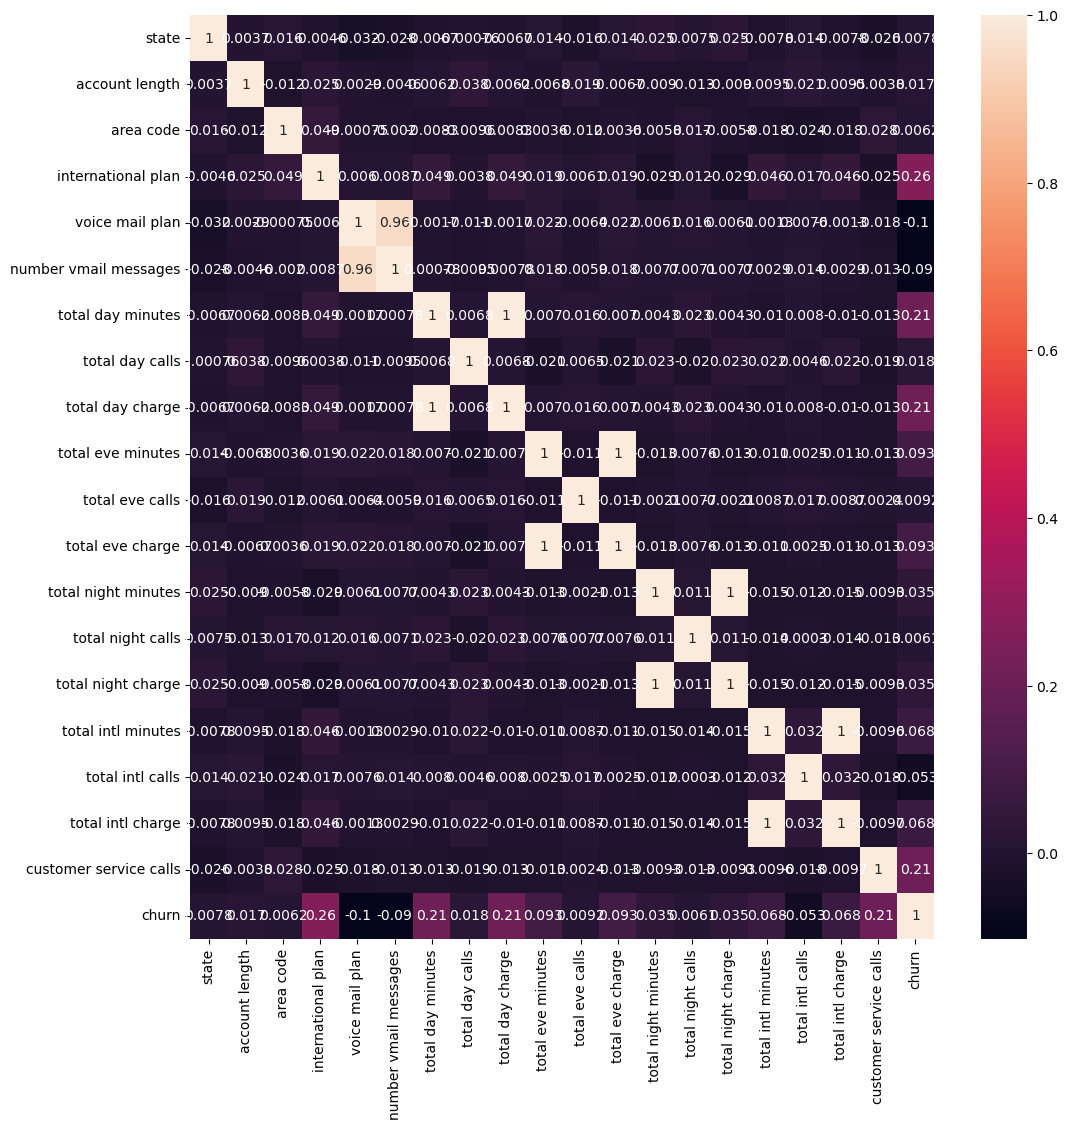

In [12]:
#creating a heatmap of the coeffecients
plt.figure(figsize=(12,12))
sns.heatmap(copy_df.corr(), annot=True);

In [13]:
#let's create a function that will enable us to create histograms quickly. 

def histogram_plotter(df, bins=30, color='steelblue'):
    num_cols = df.columns 
    num_features = len(num_cols)
    
    # Determine subplot grid size
    cols_per_row = 4
    num_rows = (num_features + cols_per_row - 1) // cols_per_row  
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(16, 4 * num_rows))
    axes = axes.flatten()  

    sns.set_palette("pastel")
    
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], bins=bins, kde=True, color=color, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}", fontsize=12)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Count")

    plt.tight_layout()
    plt.show();

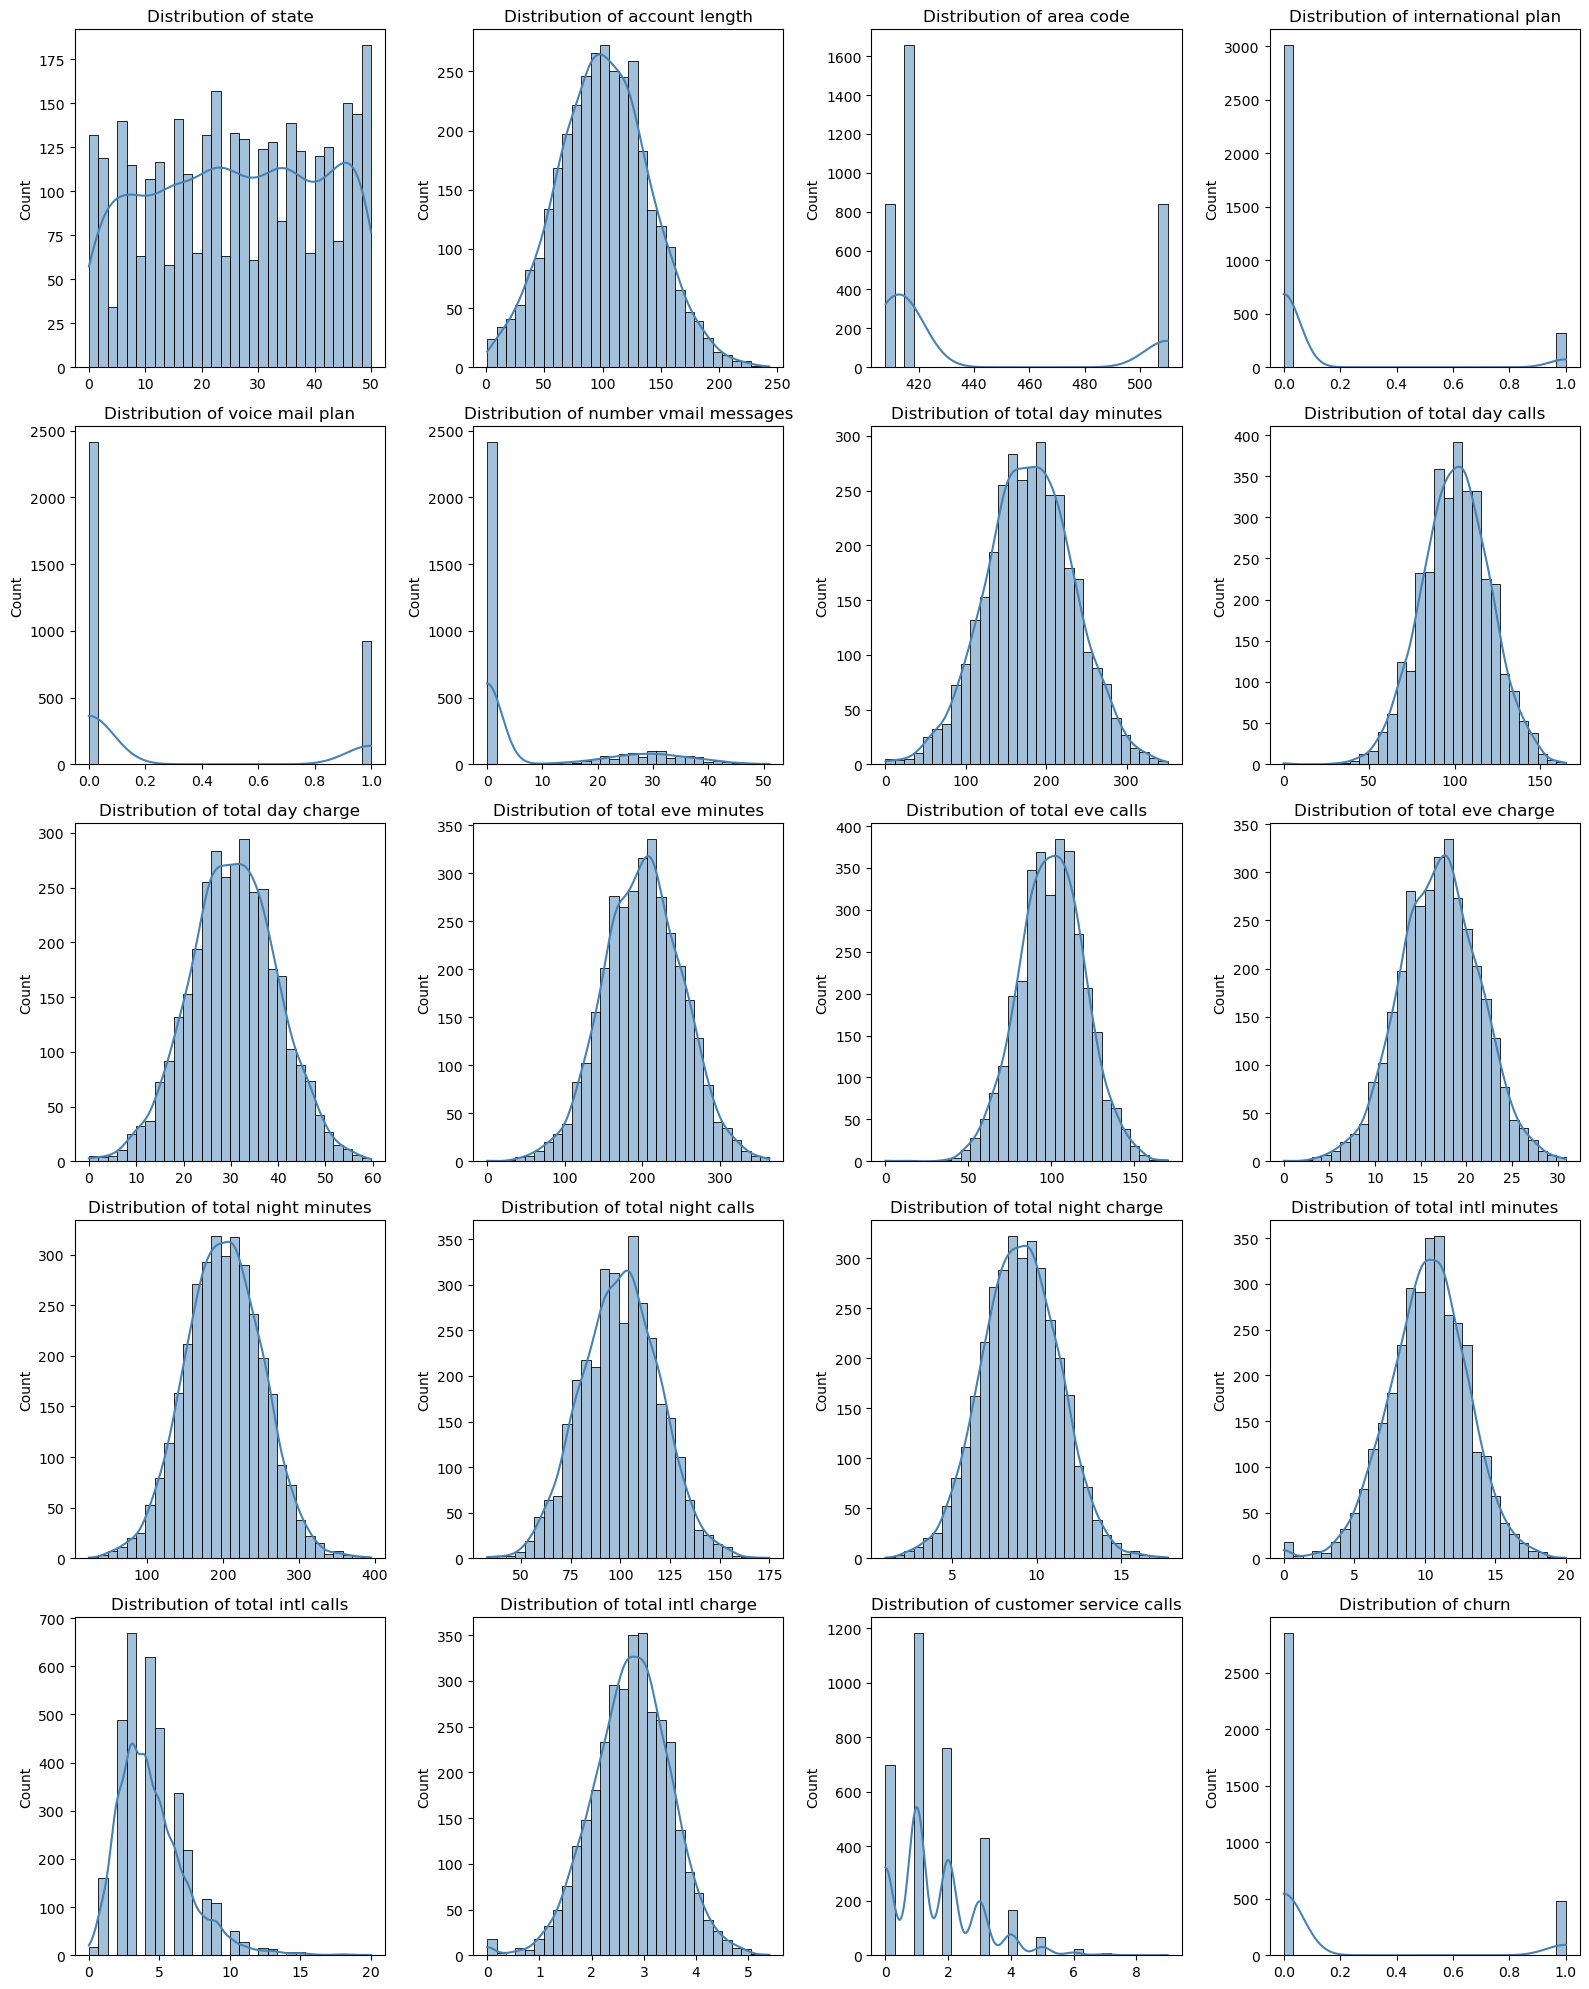

In [14]:
#creating our plots
histogram_plotter(copy_df)

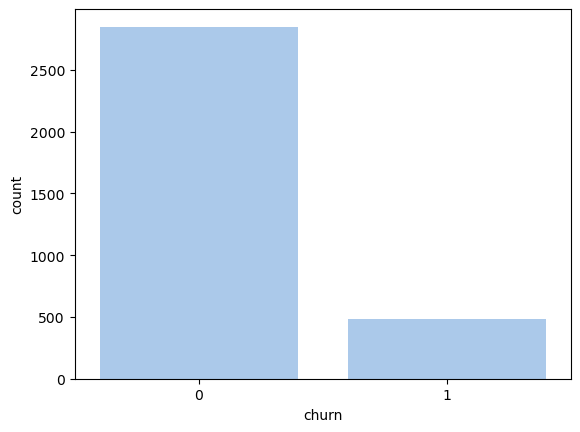

In [15]:
#Plotting the amount of customers who churn versus those who haven't. 
sns.countplot(x=copy_df['churn']);

In [16]:
#Since our dataset is so inbalanced we will use SMOTE for oversampling.

In [17]:
# Define models to test, initially we will only be using a Random Forest for our baseline model. 

models_to_test = {"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),}


In [18]:

def model_train_eval_func(df, models_dict, test_size=0.2, cv_folds=5, smote=True):
    """
    Trains and evaluates multiple models using cross-validation and test set evaluation.

    Parameters:
    - models_dict (dict): A dictionary where keys are model names, and values are model instances.
    - X (pd.DataFrame or np.array): Features dataset.
    - y (pd.Series or np.array): Target variable.
    - test_size (float): Proportion of data to be used as the test set.
    - cv_folds (int): Number of cross-validation folds.
    - smote (bool): Whether to apply SMOTE for class balancing.

    Returns:
    - results (dict): A dictionary containing trained models and their evaluation results.
    """

    X = df.drop(columns='churn', axis=1) #Features
    y = df['churn'] #Target
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Shuffle training data
    X_train, y_train = shuffle(X_train, y_train, random_state=42)

    # Apply SMOTE for class balancing
    if smote:
        smote_sampler = SMOTE(random_state=42)
        X_train, y_train = smote_sampler.fit_resample(X_train, y_train)
        print(f"Applied SMOTE: {np.bincount(y_train)} (Balanced Class Distribution)")

    # Standardization (Only for models that require it)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Results dictionary
    results = {}

    for name, model in models_dict.items():
        print(f"\nTraining model: {name}")

        # Choose correct dataset (tree-based models do not need scaling)
        if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier)):
            X_train_final, X_test_final = X_train, X_test
        else:
            X_train_final, X_test_final = X_train_scaled, X_test_scaled

        # Perform cross-validation
        cv_results = cross_validate(estimator=model, X=X_train_final, y=y_train, cv=cv_folds, return_train_score=True)

        # Compute mean and standard deviation of cross-validation scores
        mean_score = np.mean(cv_results['test_score'])
        std_score = np.std(cv_results['test_score'])

        print(f"Cross-Validation Score: {mean_score:.3f} ± {std_score:.3f}")

        # Train model on full training set
        model.fit(X_train_final, y_train)
        train_score = model.score(X_train_final, y_train)

        print(f"Score on training set: {train_score:.3f}")

        # Evaluate on test set
        y_pred = model.predict(X_test_final)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Test Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f} | F1-Score: {f1:.3f}")

        # Save results
        results[name] = {
            'model': model,
            'cv_results': cv_results,
            'train_score': train_score,
            'cv_mean_score': mean_score,
            'cv_std_score': std_score,
            'test_accuracy': accuracy,
            'test_precision': precision,
            'test_recall': recall,
            'test_f1': f1
        }

    return results


In [19]:
intl_plan_df = copy_df[['international plan', 'churn']]

In [20]:
# A very simple baseline model with only one feature, 'international plan',  with a simple Random Forest algorithm
baseline_model = model_train_eval_func(intl_plan_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: Random Forest
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311


In [21]:
# Now we can add in more features and adjust our hyperparameters. Let's first add in whether or not a customer has a voicemail plan.
intl_vm_plan_df = copy_df[['international plan', 'voice mail plan', 'churn']]
intl_vm_plan_model = model_train_eval_func(intl_vm_plan_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: Random Forest
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311


In [22]:
#hmmm there is no change?!
#let's add everything?
copied_df = copy_df.copy()
copied_model = model_train_eval_func(copied_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: Random Forest
Cross-Validation Score: 0.946 ± 0.015
Score on training set: 1.000
Test Accuracy: 0.924 | Precision: 0.791 | Recall: 0.673 | F1-Score: 0.727


In [23]:
#now we can filter to have include only a few features.
copied_df2 = copy_df[['international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'churn']]
copied_model = model_train_eval_func(copied_df2, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: Random Forest
Cross-Validation Score: 0.810 ± 0.009
Score on training set: 1.000
Test Accuracy: 0.739 | Precision: 0.279 | Recall: 0.455 | F1-Score: 0.346


In [24]:
#now that we have tested our baseline Random Forest Model, let's run our function to build several other models. 

models_to_test = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "K-Neighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(C=1e3, max_iter=int(1e3), random_state=42)}


In [25]:
# A very simple baseline model with only one feature, 'international plan',  with a simple Random Forest algorithm
intl_plan_df = copy_df[['international plan', 'churn']]
new_models = model_train_eval_func(intl_plan_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: GaussianNB
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: BernoulliNB
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: K-Neighbors
Cross-Validation Score: 0.500 ± 0.000
Score on training set: 0.500
Test Accuracy: 0.849 | Precision: 0.000 | Recall: 0.000 | F1-Score: 0.000

Training model: SVC


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Decision Tree
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Random Forest
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Logistic Regression
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311


In [26]:
# Now we can add in more features and adjust our hyperparameters. Let's first add in whether or not a customer has a voicemail plan.
intl_vm_plan_df = copy_df[['international plan', 'voice mail plan', 'churn']]
intl_vm_plan_model = model_train_eval_func(intl_vm_plan_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: GaussianNB
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: BernoulliNB
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: K-Neighbors
Cross-Validation Score: 0.506 ± 0.012
Score on training set: 0.500
Test Accuracy: 0.849 | Precision: 0.000 | Recall: 0.000 | F1-Score: 0.000

Training model: SVC


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Decision Tree
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Random Forest
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311

Training model: Logistic Regression
Cross-Validation Score: 0.603 ± 0.004
Score on training set: 0.603
Test Accuracy: 0.828 | Precision: 0.394 | Recall: 0.257 | F1-Score: 0.311


In [27]:
#hmmm there is no change?!
#let's add everything?
copied_df = copy_df.copy()
copied_model = model_train_eval_func(copied_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: GaussianNB
Cross-Validation Score: 0.713 ± 0.021
Score on training set: 0.717
Test Accuracy: 0.684 | Precision: 0.295 | Recall: 0.782 | F1-Score: 0.428

Training model: BernoulliNB
Cross-Validation Score: 0.639 ± 0.014
Score on training set: 0.643
Test Accuracy: 0.648 | Precision: 0.257 | Recall: 0.703 | F1-Score: 0.377

Training model: K-Neighbors
Cross-Validation Score: 0.863 ± 0.007
Score on training set: 0.922
Test Accuracy: 0.745 | Precision: 0.341 | Recall: 0.733 | F1-Score: 0.465

Training model: SVC
Cross-Validation Score: 0.882 ± 0.009
Score on training set: 0.924
Test Accuracy: 0.891 | Precision: 0.625 | Recall: 0.693 | F1-Score: 0.657

Training model: Decision Tree
Cross-Validation Score: 0.782 ± 0.007
Score on training set: 0.799
Test Accuracy: 0.915 | Precision: 0.729 | Recall: 0.693 | F1-Score: 0.711

Training model: Random Forest
Cross-Validation Score: 0.946 ± 0.015
Score on training set: 1.000
Te

In [28]:
#OK we can see here that Random Forest is working better than any other model.

In [29]:
#performing a grid search so that we can tweak our hyperparameters.

from sklearn.model_selection import GridSearchCV

X = copy_df.drop(columns='churn', axis=1) #Features
y = copy_df['churn'] #Target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Params: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9523634856054697


In [30]:
#now let's tweak our hyperparameters to reflect our grid search. 
models_to_test = {"Random Forest": RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=100, random_state=42)}
#testing with data
copied_df = copy_df.copy()
copied_model = model_train_eval_func(copied_df, models_to_test, smote=True)

Applied SMOTE: [2284 2284] (Balanced Class Distribution)

Training model: Random Forest
Cross-Validation Score: 0.941 ± 0.013
Score on training set: 0.999
Test Accuracy: 0.916 | Precision: 0.778 | Recall: 0.624 | F1-Score: 0.692


In [31]:
reference = ['https://www.kaggle.com/code/satoru90/telecom-churn-dataset-classification-with-96-acc',
             'https://www.kaggle.com/code/ambpro/dealing-with-unbalance-eda-pca-smote-lr-svm-dt-rf',
            'https://www.kaggle.com/code/visionary20/orange-telecom-prevention-and-predicting-churn']